#Pergunta fundamental

Qual a significância deste resultado?

#Importância das hipóteses



Na ciência é comum elaborarmos hipóteses e testarmos estas hipóteses contra dados obtidos por meio de ensaios ou amostras de uma população. Esta é a base do método científico. Uma ferramenta fundamental neste processo é o teste de hipótese estatístico. Essa é uma das mais úteis ferramentas da inferência estatística, uma vez que muitos tipos de problemas de tomada de decisão, teste, ou experimentos no mundo da engenharia podem ser formulados como problemas de teste de hipóteses.

Em um teste de hipótese nós estabelecemos duas hipóteses antagônicas (ex: a média da população é um certo valor; as médias destas populações são diferentes; etc) e, observando os dados de uma amostra aleatória, procuramos refutar (rejeitar) uma destas hipóteses, de modo que ou a outra será verdade, ou a amostra que temos é muito "estranha".

Os testes de hipótese estatísticos são feitos sobre parâmetros das populações. Assim, considere que queremos saber se um certo parâmetro $\theta$ de uma população é igual a um valor $\theta_0$ (ex: será que o tempo médio de atendimento neste servidor é de 1 segundo?), esta será nossa **hipótese nula** ($H_0$) e é ela que tentaremos rejeitar. Ela tem a seguinte forma:

$H_0 : \theta =  \theta_0$

A hipótese que compete contra esta é chamada de **hipótese alternativa** ($H_a$, mas alguns textos podem usar o termo $H_1$) e pode ter uma das três formas abaixo:

$H_a : \theta \neq  \theta_0; \, \text{forma bilateral}\\
H_a : \theta \lt  \theta_0; \, \text{forma unilateral à esquerda}\\
H_a : \theta \gt  \theta_0; \, \text{forma unilateral à direita}$

A hipótese nula sempre aparece como uma igualdade. Entretanto, quando $H_a$ for estabelecida com o sinal $\lt$, a reivindicação implícita na hipótese nula será $\geq$ e quando a $H_a$ for estabelecida com o sinal $\gt$, a reivindicação implícita na hipótese nula será $\leq$.

A escolha por um ou outra hipótese alternativa deve ser feita de acordo com o problema em estudo. Deve-se observar que as formas unilaterais são mais restritivas do que a forma bilateral e portanto precisam de maior evidência na amostra para que a hipótese nula seja rejeitada.

#Como é construído um teste de hipótese?

Além das hipóteses, um teste de hipótese é feito sobre um **parâmetro de uma população**, o qual possui uma **distribuição amostral** conhecida. Assim, há uma conexão forte entre os testes de hipótese e os **intervalos de confiança**.

A partir de uma amostra aleatória, um teste de hipótese constrói um intervalo para o parâmetro em estudo e estabelece a <u>probabilidade de termos um valor mais extremo do que o observado no intervalo, dado que a hipótese nula é verdadeira</u>. Podemos comparar esta probabilidade com um nível de significância ($\alpha$) específico, sabendo que $\alpha  = 1 - f$, em que $f$ é o nível de confiança escolhido.

## Exemplo (QI das crianças)

Para uma população de crianças com igual idade
cronológica, deseja-se testar a hipótese de que a média
populacional de seus QIs difere de 100. Para isto, aplicou-se o teste de QI a uma amostra de 400 crianças,
obtendo-se um QI médio igual a 102. Supondo que o desvio padrão da população é conhecido e igual a 17,03, pode-se afirmar, ao nível de 5%, que o QI médio da população dessas crianças difere de 100?

**Solução**: A hipótese nula é de que $\mu = 100$. Sendo esta hipótese verdadeira, sabemos que a distribuição da média amostral terá média $100$ e erro padrão $\frac{17.03}{\sqrt{400}}$.

O próximo passo é verificarmos quão "estranha" é a média amostral que coletamos dado que esta hipótese nula é verdadeira. Assim, calculamos a probabilidade de vermos uma média amostral maior do que 102 (observe que isto é a média + 2), ou menor do que seu valor simétrico (100-2 = 98).

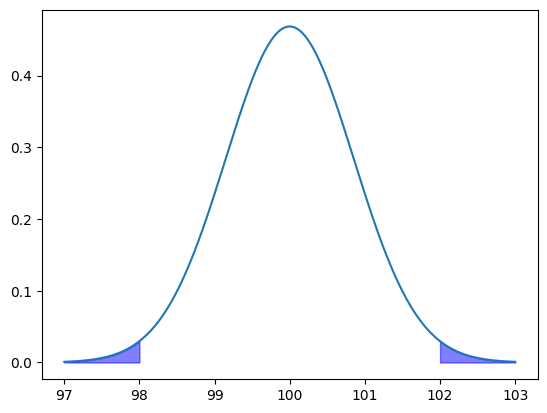

Probabilidade de termos um valor mais extremo do que o observado:  0.01883421028149073


In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

mu = 100
sigma = 17.03/sqrt(400)

x = np.linspace(97,103,1000)
fnorm = st.norm.pdf(x,mu,sigma)
plt.plot(x,fnorm)

x = np.linspace(97,98,100)
ft = st.norm.pdf(x,mu,sigma)
plt.fill_between(x,ft,alpha=0.5,color="b")

x = np.linspace(102,103,100)
ft = st.norm.pdf(x,mu,sigma)
plt.fill_between(x,ft,alpha=0.5,color="b")

plt.show()

#=================

sup = 1 - st.norm.cdf(102,mu,sigma)
inf = st.norm.cdf(98,mu,sigma)

print("Probabilidade de termos um valor mais extremo do que o observado: ", sup+inf)

A probabilidade que obtivemos é chamada de **p-valor** (*p-value*). Deste p-valor observamos que nossa amostra fornece pouca evidência para a hipótese de que $\mu = 100$, porque se $H_0$ for verdadeira a probabilidade de termos, numa amostra de 400 crianças, uma média amostral como esta ou mais extrema é de $1.8\%$, logo rejeitamos $H_0$.

## Exemplo (Bateria)

Um fabricante de baterias de notebook afirma que suas baterias duram **em média** 9,1 horas. Uma análise feita por **6 consumidores** desta bateria reportou tempo de vida com média de 8,5 horas e desvio-padrão de 39 minutos.

Faça um teste de hipótese para investigar se a alegação do fabricante é verdadeira.

**Solução**: Vamos elaborar duas hipóteses:

$H_0: \text{A média da população é de 9.1 horas} \\
H_a: \text{A média é diferente de 9.1 horas}$

A pequena amostra nos obriga a usar um modelo diferente da distribuição normal, neste caso usamos uma distribuição T de Student com 5 graus de liberdade.

Assumindo que $H_0$ é verdadeira, dizemos que $\mu_0=9.1$ é a verdadeira média da população. Assim podemos calcular $t_0 = \frac{\hat{x}-\mu_0}{\frac{s}{\sqrt{n}}}$, em que $\hat{x}$ e $s$ são, respectivamente, a média e o desvio-padrão da amostra e $n$ é o tamanho da amostra.

O próximo passo é verificarmos quão "estranha" é a amostra que coletamos dado que esta hipótese nula é verdadeira. Assim, calculamos a probabilidade de vermos uma média amostral maior do que $t_0$ ou menor do que seu valor simétrico $-t_0$.


Valor crítico: -2.261067454876778
Probabilidade de termos um valor mais extremo do que o observado: 0.07325367176078701


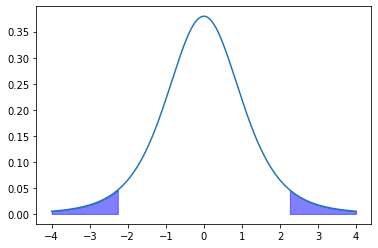

In [ ]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

n = 6
t0 = (8.5-9.1)/(0.65/np.sqrt(n))
gl = n-1
inf=st.t.cdf(t0,df=gl)
sup=1-st.t.cdf(-t0,df=gl)

print("Valor crítico:",t0)
print("Probabilidade de termos um valor mais extremo do que o observado:", sup+inf)

x = np.linspace(-4,4,1000)
ft = st.t.pdf(x,df=gl)
plt.plot(x,ft)

x = np.linspace(-4,t0,100)
ft = st.t.pdf(x,df=gl)
plt.fill_between(x,ft,alpha=0.5,color="b")

x = np.linspace(-t0,4,100)
ft = st.t.pdf(x,df=gl)
plt.fill_between(x,ft,alpha=0.5,color="b")

plt.show()

O p-valor observado indica que nossa amostra fornece evidência para a hipótese nula, indicando que não podemos rejeitá-la.

## Tipos de erro

Ao realizarmos um teste de hipóteses estamos sujeitos a
cometer dois tipos de erros: o erro do tipo I, que consiste em rejeitar a $H_0$ quando essa é
verdadeira, e o erro do tipo II, que consiste em não rejeitar $H_0$, quando ela é falsa. As probabilidades desses erros são, portanto:

$\alpha = P(\text{do erro tipo I}) = P(\text{rejeitar }H_0 | H_0 \text{verdadeira})$ e

$\beta = P(\text{do erro tipo II}) = P(\text{não rejeitar }H_0 | H_0 \text{falsa})$,

sendo que $\alpha$ também é chamado de nível de significância do teste. A tabela abaixo sumariza os tipos de erro:

Decisão | $H_0$ é verdadeira | $H_0$ é falsa |
--------|--------|--------|
Não rejeita $H_0$ | Nenhum erro | **Erro tipo II**
Rejeita $H_0$ | **Erro tipo I** | Nenhum erro

Seria desejável que os valores de $\alpha$ e $\beta$ fossem ambos tão pequenos quanto possível. No entanto, pode-se verificar que, ao diminuir-se o valor de um, o outro aumenta. Assim, na prática, costuma-se arbitrar um valor para o nível de significância, que usualmente é fixado em $0.01$ ou $0.05$ e posteriormente comparado ao p-valor.

##Significância estatística e significância prática

O engenheiro deve ter cuidado na interpretação de testes de hipótese principalmente quando a amostra tiver tamanho grande, visto que qualquer pequeno desvio do valor usado na hipótese, $\theta_0$, será provavelmente detectado, mesmo quando a diferença for de pouca ou nenhuma **significância prática**.

Isto ocorre porque embora um p-valor pequeno indique **significância estatística** no sentido de rejeitar $H_0$, o desvio real de $H_0$ detectado pode ser insignificante na prática, o que ocorre comumente quando o tamanho da amostra é grande, já que diminui o erro padrão, fazendo com que a distribuição amostral tenha pequena variabilidade em torno da média, e assim amostras com variações desprezíveis sobre a média causam a rejeição de $H_0$.

Suponha que a média verdadeira da taxa de produção em um experimento é 50.5 itens por dia, mas que nós estamos fazendo um teste de hipótese com $H_0: \mu = 50$. Se o desvio padrão da população for pequeno e a amostra retirada for muito grande (centenas de amostras), devemos esperar um erro padrão pequeno e uma média bem próxima de 50.5, fazendo com que $H_0$ seja rejeitada. Observe que o teste não está errado, contudo a diferença de 0.5 itens por dia não tem significância prática para o problema e a interpretação deve levar isso em consideração.


#Qual teste de hipótese usar?

No exemplo acima, nós construímos um teste de hipótese do zero, contudo no dia-a-dia usamos testes de **hipóteses já padronizados**, os quais são executados a partir dos dados coletados.

Um cuidado importante no uso de um teste de hipótese padronizado é determinar <u>qual teste usar</u>, <u>como usá-lo</u> (a hipótese nula, a estatística de teste e o cálculo do p-valor) e se as <u>condições para o uso do teste</u> são atendidas. Assim, pode-se ver um teste de hipótese como um algoritmo determinístico, em que a <u>amostra é um dos dados de entrada</u>. Esta é uma forma dos estatísticos organizarem o conhecimento dos testes de hipótese, de modo que outros profissionais possam fazer uso deles como uma ferramenta sem conhecer todos os detalhes da probabilidade e estatística que estão por trás daquele teste.

As condições mais comuns nos testes padronizados é que a amostra seja <u>aleatória</u> (não deve haver viés na coleta dos dados) e <u>independente</u> (pode-se supor independência quando o tamanho da amostra aleatória é menos de 10% do tamanho da população). Muitos testes supõem que a população de onde os dados provêm é <u>normalmente distribuída</u>. Sendo esta uma condição a ser verificada a partir dos dados. Outras condições podem ser necessárias em cada teste, fique atento a isto.

Estes testes podem ser realizados manualmente ou por meio de **pacotes de software**. Nos pacotes de software, por exemplo, comumente usamos estes testes <u>fornecendo dados de uma amostra, informações sobre a hipótese nula (quando necessário), informações sobre a hipótese alternativa e analisamos a saída, que é principalmente um p-valor</u>.

Uma discussão inicial sobre testes de hipóteses muito usados na computação pode ser [encontrada aqui](https://sonalake.com/latest/an-introduction-to-hypothesis-testing/).

##Lista de testes de hipótese úteis

### Roteiro para aplicação dos testes para uma e múltiplas amostras
O roteiro abaixo ilustra alguns caminhos para o uso dos testes de hipótese citados acima. Para cada teste são mostrados as hipóteses nula e alternativa, bem como o respectivo comando no softare Minitab.

<img src="https://www.isixsigma.com/wp-content/uploads/2019/01/Hypothesis-Testing-Roadmap-2.jpg" />

### Para uma amostra
Avaliam parâmetros de uma população

* Variável contínua com uma população **normalmente distribuída**
 * Teste para média: ```Teste T``` (se a variância da população é conhecida ou se $n \geq 30$ pode-se usar o ```Teste Z```)
 * Teste para proporção: ```Teste Z para proporção``` (se $np \lt 5$ ou $n(1-p) \lt 5$ então deve-se usar uma distribuição binomial)
 * Teste para variância: ```Teste qui-quadrado para variância```
* Com uma população **livre de distribuição** (não-paramétrico)
 * Teste para a mediana: ```Teste dos sinais```
 * Teste para a média: ```Teste dos postos sinalizados de Wilcoxon``` (população deve ser simétrica)
* Contagens/Frequências de dados
 * Teste para verificar se duas VAs discretas são independentes, i.e., dada uma amostra e duas categorias sobre esta amostra verifica se estas categorias são independentes: ```Teste qui-quadrado de Pearson``` também chamado ```Teste qui-quadrado de independência de variáveis em uma tabela de contigência``` (requer que frequência observada e esperada seja de ao menos 5 itens)

#### Exemplo (votantes na cidade)
A tabela abaixo é uma amostra de eleitores de um município dividos pela zona em que residem (urbana ou rural) e pela preferência de voto nos partidos políticos A, B ou C (cada eleitor escolheu apenas um partido).

Partido\Zona | Urbana | Rural|
---|---|---|
A|200|250|
B|150|300|
C|50|50|

Podemos dizer que há dependência entre a zona de residência e a preferência por um partido político?

**Solução**: Usaremos o teste qui-quadrado para esta análise. Observe que, sob a hipótese nula de independência, $P(A \cap \text{Urbana})=P(A) \times P(\text{Urbana})$. Esta condição é usada para calcular a frequência esperada em cada célula.

Ex: $P(A) = \frac{450}{1000} = 0.45$, $P(\text{Urbana}) = \frac{400}{1000} = 0.4$ e $P(A \cap \text{Urbana})=0.45 \times 0.4 = 0.18$. Assim, sob a hipótese de independência, espera-se que 180 pessoas desta amostra sejam da zona Urbana e votem no Partido A.

In [ ]:
import scipy.stats as st
import numpy as np

tabela = np.array([
  # votos no partido A
  [200,250],
  # votos no partido B
  [150,300],
  # votos no partido C
  [50,50]
])

########################
(chi_stat, p_value, degrees_of_freedom, expected) = st.chi2_contingency(tabela)
print(chi_stat)
print(p_value)
print(degrees_of_freedom)
print(expected)

16.203703703703706
0.0003029775487145484
2
[[180. 270.]
 [180. 270.]
 [ 40.  60.]]


Pelo valor p podemos rejeitar a hipótese de independência, à 95% de confiança, entre as variáveis residência e partido escolhido. Observe que as condições para o uso do teste são atendidas, já que a frequência observada e esperada em cada célula é maior que 40.

#### Exemplo (tratamento com remédio)
A tabela abaixo é uma amostra de pacientes submetidos ao tratamento preventivo contra uma doença viral muito comum com dois tipos de remédios e um grupo de controle (tratado com placebo). Para cada um deles verificamos aqueles que ficaram doentes e os que não ficaram.

Saúde\Tratamento | Remédio A | Remédio B | Placebo |
---|---|---|---|
Doente|20|30|30|
Não doente|100|110|90|

Podemos dizer que os remédios são eficazes?

**Solução**: Para averiguar a eficácia dos remédios, veremos se há alguma dependência entre as variáveis categóricas **tratamento** e **saúde**. Observe que sob a hipótese de independência, $P(\text{Doente} \cap \text{Remédio A}) = P(\text{Doente}) \times P(\text{Remédio A})$.

Abaixo montamos a tabela de contigência e, usando a biblioteca ```scipy```, obtemos o valor p, que não nos permite rejeitar a hipótese de independência (à 95% de confiança), indicando que <u>não há evidência estatística suficiente para atestar a eficácia ou ineficácia dos remédios</u>.

Observe que as condições do teste são garantidas.

In [ ]:
import scipy.stats as st
import numpy as np

tabela = np.array([
  # pacientes que ficaram doentes
  [20,30,30],
  # pacientes que não ficaram doentes
  [100,110,90]
])

########################
(chi_stat, p_value, degrees_of_freedom, expected) = st.chi2_contingency(tabela)
print(chi_stat)
print(p_value)
print(degrees_of_freedom)
print(expected)

2.5257936507936507
0.2828335193186947
2
[[ 25.26315789  29.47368421  25.26315789]
 [ 94.73684211 110.52631579  94.73684211]]


### Para duas amostras
Comparam parâmetros de duas amostras

* Dados contínuos
 * Com duas populações **normalmente distribuídas** (observe que a soma ou subtração de duas VAs normais é também normal)
   * Teste para diferença de médias ($H_0: \mu_1 - \mu_2 = \Delta_0$) de <u>duas populações independentes</u>: ```Teste t independente para duas amostras``` (se as variâncias das populações são conhecidas ou se $n_1 \geq 30$ e $n_2 \geq 30$ pode-se usar o ```Teste z para duas amostras```), quando as variâncias das populações são diferentes chama-se ```Teste t de Welch```.
   * Teste para diferença de médias da mesma população (<u>amostras relacionadas</u>): ```Teste t pareado para duas amostras```
   * Teste para igualdade de proporção ($H_0: p_1 = p_2$): ```Teste Z para proporção de duas amostras```
   * Teste para igualdade de variância de duas amostras ($H_0: \sigma_1^2 = \sigma_2^2$): ```Teste F``` (as amostras devem ser independentes e a normalidade deve ser estritamente observada); ```Teste de Bartlett``` (aceita amostras aproximadamente normais e pode ser usado para mais de duas amostras, neste caso $H_0: \sigma_1^2 = \sigma_2^2 = \ldots = \sigma_n^2$)
 * Com duas populações **livres de distribuição** (não-paramétrico)
   * Teste para igualdade de médias de populações independentes: ```Teste U de Mann-Whitney```
   * Teste para igualdade de médias da mesma população (relacionado): ```Teste dos postos sinalizados de Wilcoxon para duas amostras```
   * Teste para igualdade de variância de duas amostras: ```Teste de Levene``` (pode ser usado para mais de duas amostras)


### Testes de aderência
Checam se os dados seguem uma dada distribuição

* Para a distribuição de um conjunto de dados:
 * ```Teste qui-quadrado para adequação de ajuste```: compara frequências dos dados em grupos, sujeito à forma como os dados são divididos nos grupos, cada grupo deve ter mais de 5 itens
 * ```Teste Kolmogorov-Smirnov (KS)```: compara as CDFs, mas não deve ser usado se os parâmetros da distribuição teórica foram obtidos dos dados
 * ```Teste de Lilliefors```: variação do KS para distribuição normal e exponencial, com estimação dos parâmetros a partir dos dados
 * ```Teste Anderson-Darling```: teste robusto mesmo com estimação de parâmetros e muito usado para teste de normalidade
 * ```Teste Shapiro-Wilk```: teste mais robusto para normalidade, mas deve ser olhado com cuidado em amostras grandes ($n \gt 5000$)
* Para comparar as distribuições de duas amostras:
 * ```Teste qui-quadrado para adequação de ajuste```: mais indicado para amostras de dados discretos
 * ```Teste Kolmogorov-Smirnov (KS)```: é mais indicado para amostras de dados contínuos

###Testes de hipótese em Python
Abaixo segue lista de funções em Python para os testes citados. Para uma lista completa dos testes de hipótese disponíveis verificar os links abaixo:

[Testes Estatísticos na biblioteca ```scipy```](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)

[Testes Estatísticos na biblioteca ```statsmodels```](https://www.statsmodels.org/stable/stats.html)



Teste | Biblioteca | Função |
----|----|----|
```Teste T``` | ```scipy.stats``` | ```ttest_1samp()``` |
```Teste Z``` | ```statsmodels.stats.weightstats``` | ```ztest()``` |
```Teste Z para proporção``` | ```statsmodels.stats.proportion``` | ```proportions_ztest()``` |
```Teste Qui-quadrado para variância``` | ? | ? |
```Teste dos sinais``` | ```statsmodels.stats.descriptivestats``` | ```sign_test()``` |
```Teste dos postos sinalizados de Wilcoxon``` | ```scipy.stats``` | ```wilcoxon()``` |
```Teste qui-quadrado de Pearson``` | ```scipy.stats``` | ```chi2_contingency()``` |
```Teste T independente para duas amostras``` | ```scipy.stats``` | ```ttest_ind()``` |
```Teste Z para duas amostras``` | ```statsmodels.stats.weightstats``` | ```ztest()``` |
```Teste T pareado para duas amostras``` | ```scipy.stats``` | ```ttest_rel()``` |
```Teste Z para proporção de duas amostras``` | ```statsmodels.stats.weightstats``` | ```proportions_ztest()``` |
```Teste F``` | ```scipy.stats``` | ```f_oneway()``` |
```Teste de Bartlett``` | ```scipy.stats``` | ```bartlett()``` |
```Teste U de Mann-Whitney``` | ```scipy.stats``` | ```mannwhitneyu()```|
```Teste dos postos sinalizados de Wilcoxon para duas amostras``` | ```scipy.stats``` | ```wilcoxon()```|
```Teste de Levene``` | ```scipy.stats``` | ```levene()```|
```Teste qui-quadrado para adequação de ajuste``` | ```scipy.stats``` | ```chisquare()```|
```Teste Kolmogorov-Smirnov (KS)``` | ```scipy.stats``` | ```kstest()```|
```Teste de Lilliefors``` | ```statsmodels.stats.diagnostic``` | ```lilliefors()```|
```Teste Anderson-Darling``` | ```scipy.stats``` | ```anderson()```|
```Teste Shapiro-Wilk``` | ```scipy.stats``` | ```shapiro()```|

Como não foi possível encontrar uma função para o ```Teste Qui-quadrado para variância```, apresentamos abaixo uma função em python para este teste.

Neste teste testamos a hipótese nula de que a variância da população é um valor dado $\sigma^2_0$. Observe que este teste parte do princípio de que a distribuição amostral da variância de uma amostra de uma distribuição normal com $n$ itens, tem uma distribuição $\chi^2$ com $n-1$ graus de liberdade.

Inicialmente, deve-se calcular a estatística do teste $\chi^2_0 = \frac{(n-1)s^2}{\sigma_0^2}$ e, para o <u>caso unilateral à esquerda</u>, usa-se esta estatística para calcular $P(\chi^2_{n-1} \lt \chi^2_0)$, que será o p-valor do teste. Para os testes unilateral à direita e bilateral o processo é similar.

In [ ]:
import scipy.stats as st
import numpy as np

def chi2test(x, sigma0, alternative = "two-tailed"):
    n = len(x)
    df = n-1
    X = df * np.var(x,ddof=1) / sigma0**2
    pless = st.chi2.cdf(X,df)
    pgreater = 1 - pless
    ptwo = 2*min(pless,pgreater)
    if alternative == "lower":
        return X,pless
    elif alternative == "upper":
        return X,pgreater
    else:
        return X,ptwo

n = 25
x = np.random.normal(0, 3, n)
chi2test(x, sigma0 = 4)

(13.413984349058024, 0.08240203130984272)

#Testes de Hipótese via Bootstrapping

## Exemplo (Website)
Um teste A/B é um experimento com dois grupos para determinar qual de dois tratamentos, produtos, procedimentos, ou algo similar é melhor. Frequentemente um dos grupos recebe o tratamento padrão ou nenhum tratamento (placebo). Este é o chamado <u>grupo de controle</u>. A hipótese típica neste caso é que o tratamento testado é melhor do que o controle.

Uma empresa vende um serviço de alto valor e quer testar qual de duas apresentações de seu website (chamaremos de Páginas A e B) vende melhor. Devido o alto valor do serviço, as vendas são pouco frequentes e os ciclos de compra são longos, o que faz o processo de captura de dados de vendas muito longo. Para ter uma resposta mais rápida, a companhia decide usar o tempo gasto na página como uma medida do impacto nas vendas (um tempo de rentenção maior, indica maior interesse, que pode ser convertido em vendas).

Abaixo são mostrados os dados coletados.

A empresa pensa que a página B oferece melhor retorno do que A. Com base nos dados, discuta se esta afirmação é estatisticamente válida.


In [ ]:
!wget https://raw.githubusercontent.com/manmartgarc/s4ds/master/data/web_page_data.csv
import pandas as pd

dados = pd.read_csv("web_page_data.csv",dtype={"Page":"string","Time":"float"})

--2021-12-31 10:37:31--  https://raw.githubusercontent.com/manmartgarc/s4ds/master/data/web_page_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 441 [text/plain]
Saving to: ‘web_page_data.csv.13’

web_page_data.csv.1 100%[===================>]     441  --.-KB/s    in 0s      

2021-12-31 10:37:31 (26.5 MB/s) - ‘web_page_data.csv.13’ saved [441/441]



**Solução**: Podemos responder à questão usando um teste de hipótese. Considerando que $T_A$ é o tempo médio de retenção do usuário com a Página A e que $T_B$ é o tempo médio de retenção da Página B, as hipóteses são:

$H_0: T_A = T_B \\
H_a: T_A \gt T_B$

Iniciamos nossa análise observando a forma geral dos dados.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


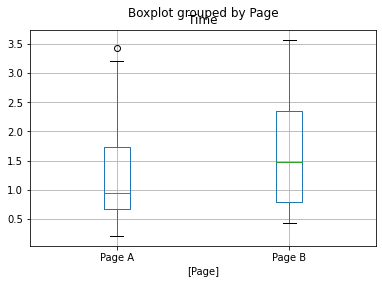

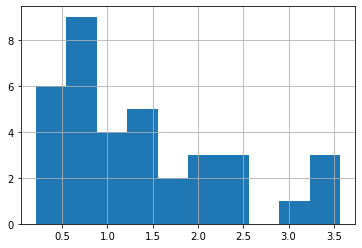

Page A    21
Page B    15
Name: Page, dtype: Int64

In [ ]:
import matplotlib.pyplot as plt

dados.boxplot(by="Page")
plt.show()
dados.Time.hist()
plt.show()
dados.Page.value_counts()

Daqui observamos que temos uma amostra pequena, com dados assimétricos e com pequena distinção entre os tipos de tratamento. São 36 amostras ao todo, das quais 21 são referentes à página A e 15 à página B.

Para uma comparação de médias, pelo tamanho das amostras, poderíamos fazer uso do ```Teste T para duas amostras independentes```, porém antes precisamos checar a hipótese de normalidade de cada amostra, o que fazemos abaixo.

count    21.000000
mean      1.263333
std       0.884632
min       0.210000
25%       0.670000
50%       0.950000
75%       1.730000
max       3.420000
Name: Time, dtype: float64
p-valor Page A 0.01751510053873062
count    15.000000
mean      1.620000
std       1.011364
min       0.430000
25%       0.800000
50%       1.470000
75%       2.345000
max       3.570000
Name: Time, dtype: float64
p-valor Page B 0.16119416058063507


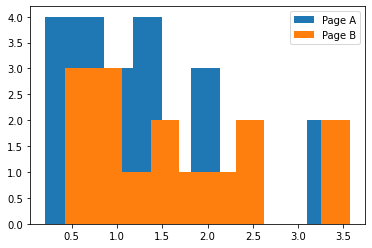

In [ ]:
import scipy.stats as st

pageA = dados[dados.Page == "Page A"].Time
pageB = dados[dados.Page == "Page B"].Time
plt.hist(pageA,label="Page A")
plt.hist(pageB,label="Page B")
plt.legend()
estatistica,pvalor = st.shapiro(pageA)
print(pageA.describe())
print("p-valor Page A",pvalor)
estatistica,pvalor = st.shapiro(pageB)
print(pageB.describe())
print("p-valor Page B",pvalor)

Pelo teste Shapiro-Wilk, podemos rejeitar a hipótese de normalidade da amostra da Página A (com 95% de confiança), mas não da amostra da Página B. Contudo, devemos observar que os dados de ambas as amostras possuem assimetria à esquerda, o que nos ajuda à rejeitar hipótese de normalidade em ambos os casos.

Assim, poderíamos usar um teste não-paramétrico para comparação de médias.

In [ ]:
st.mannwhitneyu(pageA,pageB,alternative="greater")

MannwhitneyuResult(statistic=119.5, pvalue=0.8916821872054765)

O teste U de Mann-Whitney nos indica que não podemos rejeitar a hipótese de que as amostras tem médias  iguais.

Uma forma alternativa de chegarmos ao mesmo resultado é construindo um teste de hipótese de permutação via *bootstrap*. Este tipo de teste nos ajuda a verificar a validade da hipótese a partir dos dados em si, sem fazer maiores suposições acerca da amostras.

A técnica *bootstrap* consiste em fazer **reamostragens** dos dados com o intuito de construir uma distribuição para a estatística que estamos tentando mostrar.

Neste exemplo, nossa hipótese nula pode ser reescrita como $H_0: T_A - T_B = 0$. Assim, podemos construir a distribuição da estatística $T_D = T_A - T_B$, que indica a diferença entre os tempos médios das duas amostras, a partir de reamostragens dos dados. Fazemos isso da seguinte forma:

1. Calculamos a estatística na amostra original e guardamos. Chamaremos esta de $T_0$.
2. A partir das 36 amostras, fazemos reamostragem aleatória com reposição, de modo a reconstruir uma amostra de 21 itens para a Página A e outra de 15 itens para a Página B. E computamos $T_D$ para esta amostra.
3. Repetimos este processo $R$ vezes.

Observe que a permutação com reamostragem reconstrói a distribuição de $T_D$ considerando que os tratamentos são indistinguíveis (todos os tempos provenientes de um único tratamento), desta forma poderemos verificar o quão extrema é a amostra original, caso estas amostras viessem de uma mesma população (o que levaria à $T_D = 0$).

Abaixo fazemos este processo com $R=1000$.

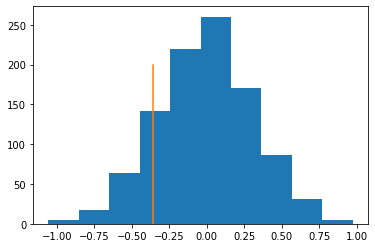

T0 =  -0.35666666666666713
p-valor =  0.864


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

def reamostra(dados,n1,n2):
 pageA = random.choices(dados,k=n1)
 pageB = random.choices(dados,k=n2)
 return np.mean(pageA) - np.mean(pageB)

def boot(dados,n1,n2,t0,R=1000):
 Td = []
 for i in range(R):
   Td.append(reamostra(dados,n1,n2))
 plt.hist(Td)
 plt.plot([t0,t0],[0,200])
 plt.show()
 pvalor = sum(i > t0 for i in Td)/R
 print("T0 = ",t0)
 print("p-valor = ",pvalor)

t0 = np.mean(pageA) - np.mean(pageB)
boot(dados.Time,21,15,t0,R=1000)

Destes resultados concluímos que não temos evidência estatística para suportar a afirmativa da empresa. Em outras palavras, não podemos rejeitar a hipótese de que ambas as páginas trazem o mesmo tempo médio de retenção.

# Lembretes finais
* O teste de hipótese consiste em analisar a amostra considerando que a hipótese nula é verdadeira
 * O p-valor indica a probabilidade de obter um valor tão ou mais extremo do que o obtido na amostra, considerando que a hipótese nula é verdadeira
* Existem muitos testes de hipótese para muitas ocasiões, nosso objetivo aqui foi dar uma visão geral e apresentar os mais conhecidos.
* Amostras muito grandes podem tornar significante algo que é insignificante na prática.
 * Isso pode ser usado de forma pouco ética, modificando o tamanho da amostra para obter um resultado desejado (*hacking* de p-valor).
 * A estatística oferece formas "justas" de determinar o tamanho adequado de amostras

# **Bônus**: Distribuições comuns em testes de hipótese

## Distribuição T de Student

É uma família de distribuições contínuas de probabilidade de um único parâmetro (denominado grau de liberdade ($\nu$)), usada para modelar amostras próximas da normal. Diverge da normal por ter caudas mais "gordas" (probabilidade de valores distantes da média é maior do que a normal).

* Média: $0$ para $\nu \gt 1$
* Variância: $\frac{\nu}{\nu-2}$ para $\nu \gt 2$; $\infty$ para $ 1 \lt \nu \lt 2$; indefinido para outros casos.
* Distribuição de probabilidade: $f(x) = \frac{\Gamma \left(\frac{\nu+1}{2} \right)} {\sqrt{\nu\pi}\,\Gamma \left(\frac{\nu}{2} \right)} \left(1+\frac{x^2}{\nu} \right)^{-\frac{\nu+1}{2}}\!$, onde ${\Gamma (z)=\int _{0}^{\infty }t^{z-1}e^{-t}\,dt}$
* Distribuição acumulada de probabilidade: $F(x)=
     \frac{1}{2} + x \Gamma \left( \frac{\nu+1}{2} \right)  \times\\
     \frac{\,_2F_1 \left ( \frac{1}{2},\frac{\nu+1}{2};\frac{3}{2};           -\frac{x^2}{\nu} \right)}
     {\sqrt{\pi\nu}\,\Gamma \left(\frac{\nu}{2}\right)}$



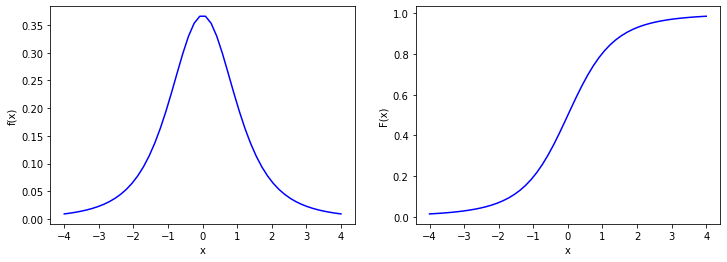

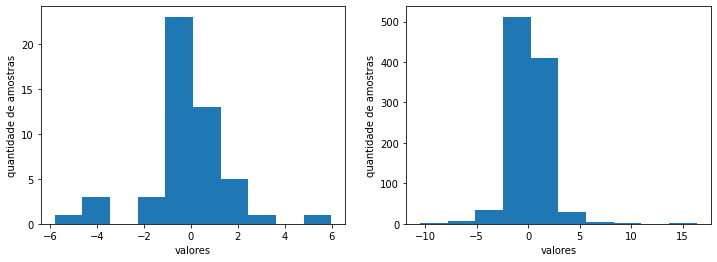

In [ ]:
import numpy as np
import scipy.stats as st
import random
import matplotlib.pyplot as plt

def plotDistribuicaoCont(x,fx,Fx):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.plot(x,f,'b',ms=8)
  plt.xlabel("x")
  plt.ylabel("f(x)")

  plt.subplot(1,2,2)
  plt.plot(x,F,'b',ms=8)
  plt.xlabel("x")
  plt.ylabel("F(x)")
  plt.show()

def histograma(dados):
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  x = random.sample(list(dados),int(len(dados)*0.05))
  plt.hist(x)
  plt.xlabel("valores")
  plt.ylabel("quantidade de amostras")
  plt.subplot(1,2,2)
  plt.hist(dados)
  plt.xlabel("valores")
  plt.ylabel("quantidade de amostras")

nu = 3
x = np.linspace(-4,4)
f = st.t.pdf(x,nu)
F = st.t.cdf(x,nu)
plotDistribuicaoCont(x,f,F)
dados = st.t.rvs(nu,size=1000)
histograma(dados)

##Distribuição $\chi^2$ (qui-quadrado)

É uma distribuição contínua de probabilidade para valores positivos de um único parâmetro (denominado grau de liberdade ($k$)). Esta é a distribuição da soma dos quadrados de $k$ variáveis aleatórias normais independentes. Ela é um caso especial da distribuição Gama e é muito usada em estatística inferencial.

* Média: $k$
* Variância: $2k$
* Distribuição de probabilidade: $f(x) = {\frac {1}{2^{k/2}\Gamma (k/2)}}\;x^{k/2-1}e^{-x/2}$, onde ${\Gamma (z)=\int _{0}^{\infty }t^{z-1}e^{-t}\,dt}$
* Distribuição acumulada de probabilidade: $F(x)= {\frac {1}{\Gamma (k/2)}}\;\gamma \left({\frac {k}{2}},\,{\frac {x}{2}}\right)$, onde $ \gamma(k,x) = \int_0^x t^{k-1}\,e^{-t}dt$



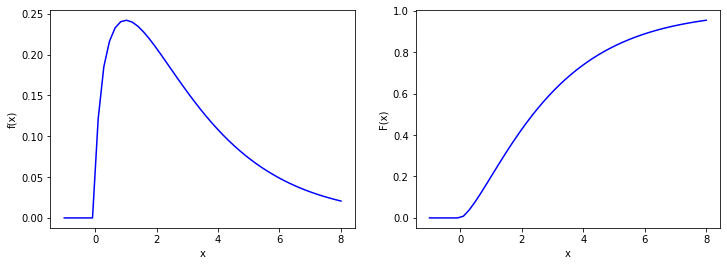

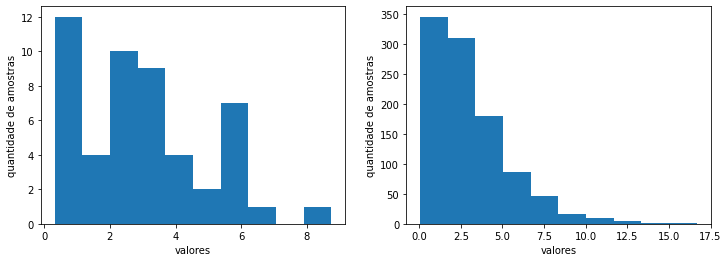

In [ ]:
k = 3
x = np.linspace(-1,8)
f = st.chi2.pdf(x,k)
F = st.chi2.cdf(x,k)
plotDistribuicaoCont(x,f,F)
dados = st.chi2.rvs(k,size=1000)
histograma(dados)

## Distribuição F

A distribuição F, também chamada de Distribuição F de Snedecor, é uma função contínua definida pela razão de duas distribuições $\chi^2$ com graus de liberdade $d_1$ e $d_2$ (que são os parâmetros da distribuição F). Esta função é utilizada em testes associados à igualdade de variâncias.


* Média: $\frac  {d_{2}}{d_{2}-2}$, para $d_2 \gt 2$
* Variância: $\frac  {2\,d_{2}^{2}\,(d_{1}+d_{2}-2)}{d_{1}(d_{2}-2)^{2}(d_{2}-4)}$, para $d_2 \gt 4$
* Distribuição de probabilidade: $f(x) = {\frac {\sqrt {\frac {(d_{1}x)^{d_{1}}d_{2}^{d_{2}}}{(d_{1}x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}$, onde ${B(\alpha ,\beta )=\frac {\Gamma (\alpha )\Gamma (\beta )}{\Gamma (\alpha +\beta )}} $ e ${\Gamma (z)=\int _{0}^{\infty }t^{z-1}e^{-t}\,dt}$
* Distribuição acumulada de probabilidade: $F(x) = I_{{{\frac  {d_{1}x}{d_{1}x+d_{2}}}}}\left({\tfrac  {d_{1}}{2}},{\tfrac  {d_{2}}{2}}\right)$, onde $I_{x}(a,b)={\frac {\mathrm {B} (x;\,a,b)}{\mathrm {B} (a,b)}}$ e $B (x;\alpha,\beta)=\int _{0}^{x}t^{\alpha-1}\,(1-t)^{\beta-1}\,dt$

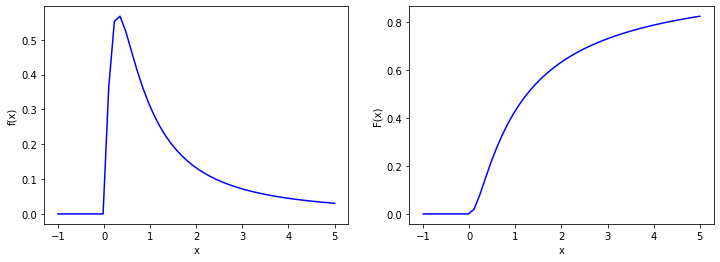

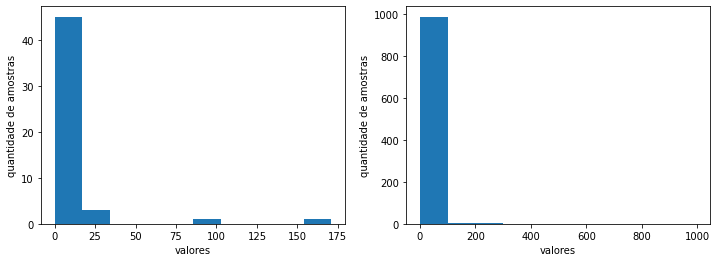

In [ ]:
d1 = 5
d2 = 2
x = np.linspace(-1,5)
f = st.f.pdf(x,d1,d2)
F = st.f.cdf(x,d1,d2)
plotDistribuicaoCont(x,f,F)
dados = st.f.rvs(d1,d2,size=1000)
histograma(dados)